<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning-cnns/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download da Base de Dados

In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2021-09-26 15:30:39--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.243.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.243.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  16.2MB/s    in 82s     

2021-09-26 15:32:01 (15.7 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [2]:
!tar zxf imagewoof2.tgz

In [3]:
import glob

In [4]:
all_train_paths = glob.glob('/content/imagewoof2/train/*/*.JPEG')

In [5]:
import random
from PIL import Image

/content/imagewoof2/train/n02099601/n02099601_5883.JPEG


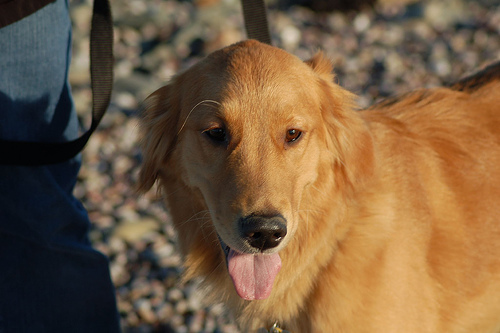

In [6]:
img_path = random.choice(all_train_paths)
print(img_path)
Image.open(img_path)

In [7]:
len(all_train_paths)

9025

## Declarando ImageDataGenerator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [9]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_gen = datagen.flow_from_directory('/content/imagewoof2/train',
                            target_size=(224, 224),
                            class_mode='sparse')

valid_gen = datagen.flow_from_directory('/content/imagewoof2/val',
                            target_size=(224, 224),
                            class_mode='sparse')

Found 9025 images belonging to 10 classes.
Found 3929 images belonging to 10 classes.


In [11]:
preprocess_input?

## Declarando Modelo

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [13]:
base_model = ResNet50(include_top=False,
                      input_shape=(224, 224, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [15]:
for layer in base_model.layers:
    layer.trainable=False

In [16]:
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'),
                    Dense(10, activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 25,696,138
Trainable params: 2,108,426
Non-trainable params: 23,587,712
_________________________________________________________________


## Treinar o modelo

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_gen,
          validation_data=valid_gen,
          epochs=3)

Epoch 1/3
283/283 [==============================] - 93s 261ms/step - loss: 0.3332 - accuracy: 0.8994 - val_loss: 0.2016 - val_accuracy: 0.9364
Epoch 2/3
283/283 [==============================] - 73s 258ms/step - loss: 0.1384 - accuracy: 0.9557 - val_loss: 0.2039 - val_accuracy: 0.9328
Epoch 3/3
283/283 [==============================] - 73s 257ms/step - loss: 0.0911 - accuracy: 0.9715 - val_loss: 0.1995 - val_accuracy: 0.9371


## Visualizando Predições

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
lbl_dict = dict(
  n02086240= 'Shih-Tzu',
  n02087394= 'Rhodesian ridgeback',
  n02088364= 'Beagle',
  n02089973= 'English foxhound',
  n02093754= 'Australian terrier',
  n02096294= 'Border terrier',
  n02099601= 'Golden retriever',
  n02105641= 'Old English sheepdog',
  n02111889= 'Samoyed',
  n02115641= 'Dingo'
)

In [29]:
img=Image.open('/content/imagewoof2/val/n02087394/ILSVRC2012_val_00000102.JPEG')

In [30]:
img=img.resize((224, 224))

In [31]:
img_np=np.array(img)

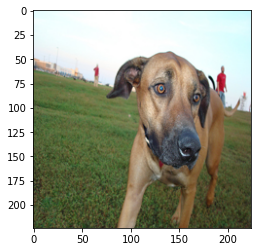

In [32]:
plt.imshow(img_np)

In [33]:
img_np=preprocess_input(img_np)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


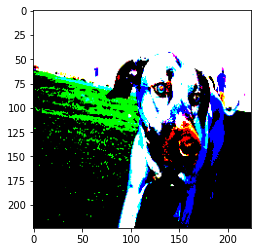

In [34]:
plt.imshow(img_np)

In [35]:
img_np[None].shape

(1, 224, 224, 3)

In [36]:
img_np=img_np.reshape(1, 224, 224, 3)

In [37]:
result=model.predict(img_np)

In [38]:
id_max = result[0].argmax()
id_max

1

In [39]:
train_gen.class_indices.items()

dict_items([('n02086240', 0), ('n02087394', 1), ('n02088364', 2), ('n02089973', 3), ('n02093754', 4), ('n02096294', 5), ('n02099601', 6), ('n02105641', 7), ('n02111889', 8), ('n02115641', 9)])

In [40]:
index_to_class = {v: k for k, v in train_gen.class_indices.items()}

In [41]:
index_class=index_to_class[id_max]
lbl_dict[index_class]

'Rhodesian ridgeback'

In [42]:
!wget https://cdn.pixabay.com/photo/2021/08/16/18/29/samoyed-6551007__340.jpg

--2021-09-26 15:36:43--  https://cdn.pixabay.com/photo/2021/08/16/18/29/samoyed-6551007__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28199 (28K) [image/jpeg]
Saving to: ‘samoyed-6551007__340.jpg’

samoyed-6551007__34 100%[===================>]  27.54K  --.-KB/s    in 0s      

2021-09-26 15:36:43 (104 MB/s) - ‘samoyed-6551007__340.jpg’ saved [28199/28199]



In [43]:
!wget https://www.ourofinosaudeanimal.com/media/old/uploads/blog/post/fotos/2014/20140828114913.jpg

--2021-09-26 15:36:43--  https://www.ourofinosaudeanimal.com/media/old/uploads/blog/post/fotos/2014/20140828114913.jpg
Resolving www.ourofinosaudeanimal.com (www.ourofinosaudeanimal.com)... 200.152.183.71
Connecting to www.ourofinosaudeanimal.com (www.ourofinosaudeanimal.com)|200.152.183.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261078 (255K) [image/jpeg]
Saving to: ‘20140828114913.jpg’

20140828114913.jpg  100%[===================>] 254.96K   177KB/s    in 1.4s    

2021-09-26 15:36:47 (177 KB/s) - ‘20140828114913.jpg’ saved [261078/261078]



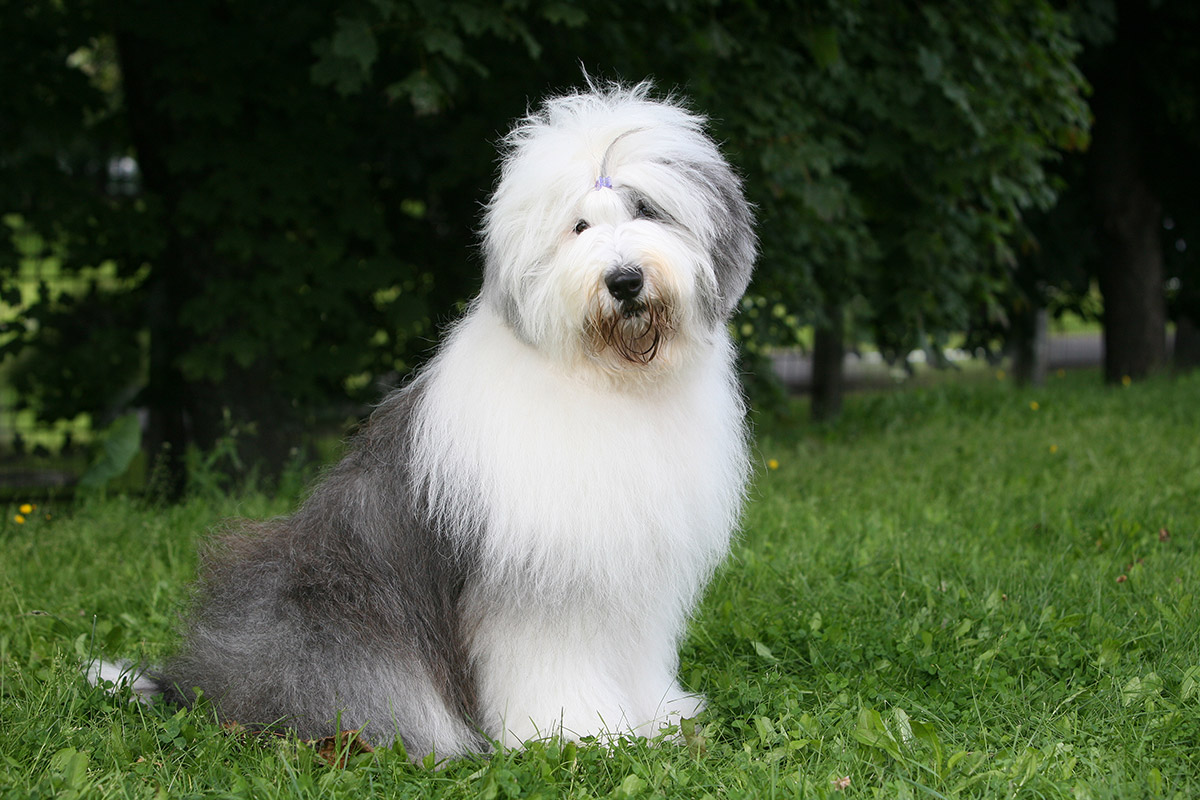

In [44]:
img=Image.open('20140828114913.jpg')
img

In [45]:
img=img.resize((224, 224))
img_np=np.array(img)
img_np=preprocess_input(img_np)
img_np=img_np[None]
result=model.predict(img_np)
id_max = result[0].argmax()
proba = result[0][id_max]
index_class=index_to_class[id_max]
lbl_dict[index_class]

'Old English sheepdog'

In [46]:
proba

0.99560684